In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Exibindo o data frame inicial

In [6]:
contas = pd.read_excel('Contas.xlsx')
contas

,matric,sexo,idade,atend,tuss,servico,plano,vl_unit,vl_ref,qtde
0,14944,F,65.9,2011-07-04,41401409,TESTES CUTANEO-ALERGICOS PARA POLENS,1153,509.237331,414.01409,2
1,13038,M,62.8,2011-07-05,20104146,IMUNOTERAPIA INESPECIFICA - 30 DIAS - PLANEJAM...,1129,263.364313,201.04146,3
2,13783,M,62.8,2011-07-05,41401409,TESTES CUTANEO-ALERGICOS PARA POLENS,1139,534.078176,414.01409,2
3,11790,F,59.9,2011-07-06,41401409,TESTES CUTANEO-ALERGICOS PARA POLENS,1169,716.244376,414.01409,2
4,13591,F,59.9,2011-07-06,20104146,IMUNOTERAPIA INESPECIFICA - 30 DIAS - PLANEJAM...,1195,404.093335,201.04146,4
...,...,...,...,...,...,...,...,...,...,...
994,11817,F,72.2,2018-01-30,31602614,PORTE ANESTESICO 2,1046,641.533064,316.02614,5
995,10192,F,44.4,2018-01-31,31602614,PORTE ANESTESICO 2,1091,363.430061,316.02614,5
996,10873,F,77.2,2018-01-31,31602622,PORTE ANESTESICO 3,1034,474.039330,316.02622,2
997,14693,F,77.2,2018-01-31,31602614,PORTE ANESTESICO 2,1110,676.295940,316.02614,2


Adicionando as novas colunas para realizar a análise

In [7]:
#estabelencendo as faixas etarias
faixas = [0, 18, 23, 28, 33, 38, 43, 48, 53, 58, 200]
contas["faixa etária"] = pd.cut(contas["idade"].apply(np.floor),faixas, include_lowest=True)

#Calculando o valor total de cada serviço prestado
contas["total"] = contas['vl_unit']*contas["qtde"]

#registrando separadamente o ano da realização
contas["ano"] = contas["atend"].dt.year

contas

,matric,sexo,idade,atend,tuss,servico,plano,vl_unit,vl_ref,qtde,faixa etária,total,ano
0,14944,F,65.9,2011-07-04,41401409,TESTES CUTANEO-ALERGICOS PARA POLENS,1153,509.237331,414.01409,2,"(58.0, 200.0]",1018.474661,2011
1,13038,M,62.8,2011-07-05,20104146,IMUNOTERAPIA INESPECIFICA - 30 DIAS - PLANEJAM...,1129,263.364313,201.04146,3,"(58.0, 200.0]",790.092938,2011
2,13783,M,62.8,2011-07-05,41401409,TESTES CUTANEO-ALERGICOS PARA POLENS,1139,534.078176,414.01409,2,"(58.0, 200.0]",1068.156352,2011
3,11790,F,59.9,2011-07-06,41401409,TESTES CUTANEO-ALERGICOS PARA POLENS,1169,716.244376,414.01409,2,"(58.0, 200.0]",1432.488751,2011
4,13591,F,59.9,2011-07-06,20104146,IMUNOTERAPIA INESPECIFICA - 30 DIAS - PLANEJAM...,1195,404.093335,201.04146,4,"(58.0, 200.0]",1616.373338,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,11817,F,72.2,2018-01-30,31602614,PORTE ANESTESICO 2,1046,641.533064,316.02614,5,"(58.0, 200.0]",3207.665321,2018
995,10192,F,44.4,2018-01-31,31602614,PORTE ANESTESICO 2,1091,363.430061,316.02614,5,"(43.0, 48.0]",1817.150305,2018
996,10873,F,77.2,2018-01-31,31602622,PORTE ANESTESICO 3,1034,474.039330,316.02622,2,"(58.0, 200.0]",948.078660,2018
997,14693,F,77.2,2018-01-31,31602614,PORTE ANESTESICO 2,1110,676.295940,316.02614,2,"(58.0, 200.0]",1352.591879,2018


Quantidade de serviços prestados por sexo e faixa etária

In [8]:
quantServices = contas.groupby(by=["sexo","faixa etária"])["qtde"].sum().reset_index()
quantServices


,sexo,faixa etária,qtde
0,F,"(-0.001, 18.0]",245
1,F,"(18.0, 23.0]",126
2,F,"(23.0, 28.0]",89
3,F,"(28.0, 33.0]",54
4,F,"(33.0, 38.0]",116
5,F,"(38.0, 43.0]",119
6,F,"(43.0, 48.0]",138
7,F,"(48.0, 53.0]",203
8,F,"(53.0, 58.0]",283
9,F,"(58.0, 200.0]",737


Quantidade de pessoas atendidas por sexo e faixa etária 

In [9]:
quantAgeSex = contas.groupby(by=["sexo","faixa etária"])["plano"].count().reset_index().rename(columns={"plano":"pacientes"})
quantAgeSex

,sexo,faixa etária,pacientes
0,F,"(-0.001, 18.0]",74
1,F,"(18.0, 23.0]",34
2,F,"(23.0, 28.0]",19
3,F,"(28.0, 33.0]",10
4,F,"(33.0, 38.0]",27
5,F,"(38.0, 43.0]",32
6,F,"(43.0, 48.0]",45
7,F,"(48.0, 53.0]",60
8,F,"(53.0, 58.0]",85
9,F,"(58.0, 200.0]",188


Valor total cobrado por plano de acordo com cada faixa etária e sexo do paciente

In [10]:
totalValuePlanAgeSex = contas.groupby(by=["plano","sexo","faixa etária"])["total"].sum().reset_index()
totalValuePlanAgeSex

,plano,sexo,faixa etária,total
0,1001,F,"(-0.001, 18.0]",0.000000
1,1001,F,"(18.0, 23.0]",0.000000
2,1001,F,"(23.0, 28.0]",942.644355
3,1001,F,"(28.0, 33.0]",0.000000
4,1001,F,"(33.0, 38.0]",0.000000
...,...,...,...,...
3975,1200,M,"(38.0, 43.0]",0.000000
3976,1200,M,"(43.0, 48.0]",0.000000
3977,1200,M,"(48.0, 53.0]",119.192036
3978,1200,M,"(53.0, 58.0]",0.000000


Os 10 serviços com maiores valores cobrados

In [15]:
biggestValues = contas.groupby(by=['servico'])['total'].sum()
biggestValues = biggestValues.sort_values(ascending=False)

listBiggestValues = list(biggestValues[0:10])

print("Os 10 serviços com os maiores valores cobrados são: ", end='')
for i in range(len(listBiggestValues)-1):
    print(f"{listBiggestValues[i]}, ", end='')
print(f"{listBiggestValues[9]}.")

Os 10 serviços com os maiores valores cobrados são: 836432.7052608, 203895.9938484, 107597.164566, 91078.75660400001, 84305.6317656, 54554.598917999996, 29759.3327892, 24618.528584, 23092.6090185, 17214.700041000004.


Quantidade e o valor total cobrado de exames de EcoDopplerCardiograma em um determinado ano.

In [25]:
ano = int(input("Digite o ano: "))

quantTotalValueEcoDop = contas[contas['servico'].str.contains("ECODOPPLER")]
quantTotalValueEcoDop = quantTotalValueEcoDop.groupby(by=["ano"]).sum().reset_index()
quantTotalValueEcoDop = quantTotalValueEcoDop.loc[quantTotalValueEcoDop["ano"]==ano]

quantTotalValueEcoDop[['ano', 'qtde', 'total']]


,ano,qtde,total
1,2016,25,16544.487792


Quantidade de exames com valores unitários 30% acima ou abaixo do valor de referência.

In [28]:
values = contas

#estabelecendo menor e maior valor aceito
values["minimo"] = 0.7*values["vl_ref"]
values["maximo"] = 1.3*values["vl_ref"]

values = values.query("minimo>vl_unit | vl_unit>maximo")

totalQuant = len(values.index)

print(f"A quantidade de exames com valores acima ou abaixo da margem aceita é: {totalQuant}")
values


A quantidade de exames com valores acima ou abaixo da margem aceita é: 724


,matric,sexo,idade,atend,tuss,servico,plano,vl_unit,vl_ref,qtde,faixa etária,total,ano,minimo,maximo
1,13038,M,62.8,2011-07-05,20104146,IMUNOTERAPIA INESPECIFICA - 30 DIAS - PLANEJAM...,1129,263.364313,201.04146,3,"(58.0, 200.0]",790.092938,2011,140.729022,261.353898
3,11790,F,59.9,2011-07-06,41401409,TESTES CUTANEO-ALERGICOS PARA POLENS,1169,716.244376,414.01409,2,"(58.0, 200.0]",1432.488751,2011,289.809863,538.218317
4,13591,F,59.9,2011-07-06,20104146,IMUNOTERAPIA INESPECIFICA - 30 DIAS - PLANEJAM...,1195,404.093335,201.04146,4,"(58.0, 200.0]",1616.373338,2011,140.729022,261.353898
5,10897,F,57.7,2011-07-11,41401379,TESTES CUTANEO-ALERGICOS PARA ALIMENTOS,1143,542.358065,414.01379,1,"(53.0, 58.0]",542.358065,2011,289.809653,538.217927
7,13949,M,66.2,2011-10-08,40101037,TESTE ERGOMETRICO COMPUTADORIZADO (INCLUI ECG ...,1143,669.687318,401.01037,1,"(58.0, 200.0]",669.687318,2011,280.707259,521.313481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,10773,F,72.2,2018-01-30,10101020,CONSULTA EM DOMICILIO,1139,171.717340,101.01020,1,"(58.0, 200.0]",171.717340,2018,70.707140,131.313260
993,11651,F,25.1,2018-01-30,10101020,CONSULTA EM DOMICILIO,1121,158.586014,101.01020,1,"(23.0, 28.0]",158.586014,2018,70.707140,131.313260
994,11817,F,72.2,2018-01-30,31602614,PORTE ANESTESICO 2,1046,641.533064,316.02614,5,"(58.0, 200.0]",3207.665321,2018,221.218298,410.833982
996,10873,F,77.2,2018-01-31,31602622,PORTE ANESTESICO 3,1034,474.039330,316.02622,2,"(58.0, 200.0]",948.078660,2018,221.218354,410.834086


Grafico do valor total de acordo com cada faixa etária

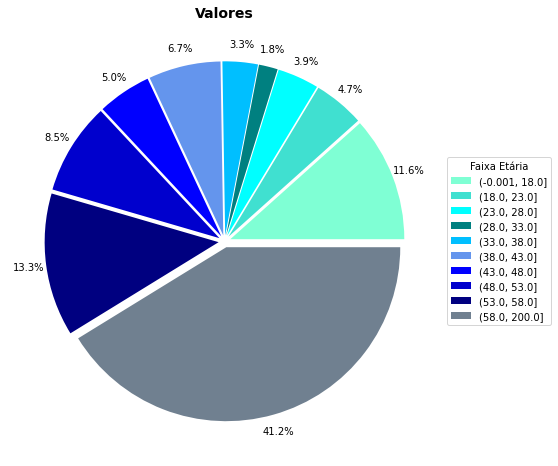

In [29]:

table = contas.groupby(by=['faixa etária'])['total'].sum().reset_index()
totalList = list(table["total"])

legend = []
for i in range(len(totalList)):
  legend.append(table.iloc[i]['faixa etária'])

separation=[]
for i in range(len(totalList)):
  separation.append(0.035)
  
colors = ['aquamarine', 'turquoise','aqua','teal','deepskyblue', "cornflowerblue", "blue", "mediumblue", "navy", "slategray"]

fig, ax = plt.subplots(figsize=(20, 8))
ax.pie(totalList, autopct='%0.1f%%',colors=colors, pctdistance=1.1,explode=separation)
ax.legend(legend, title="Faixa Etária", loc="center left", bbox_to_anchor=(1, 0.5,0,0))
ax.set_title("Valores",fontsize = 14, color = 'black',fontweight = "bold")

plt.show()

